###  Import Libraries and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")



# Load the dataset
df = pd.read_csv('C:/project/Telco_Churn_Predictor/data/telco_customer_churn.csv')

# Display the first few rows of the dataset
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


1. The dataset consists of customer data for a telecom company, containing 7,043 rows and 21 columns.
2. Key columns include customerID, gender, SeniorCitizen, Partner, Dependents, tenure, MonthlyCharges, TotalCharges, and Churn.
3. The Churn column indicates whether a customer has churned (1) or not (0), making it the target variable for our predictive modeling.


###  Check Data Types and Missing Values

In [2]:
# Check for missing values
missing_values = df.isnull().sum()

# Display missing values
missing_values[missing_values > 0]


Series([], dtype: int64)

The TotalCharges column has missing values. It is crucial to handle these before further analysis and modeling, as missing values can lead to errors or biases in model predictions.


### Fill Missing Values

In [3]:
# Fill missing values in 'TotalCharges' with the median
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0)  # Replace blank spaces with 0
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert to numeric
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Check again for missing values
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The missing values in TotalCharges have been filled with the median, ensuring that the dataset is now free of null values, which is essential for model training.


### Data Type Conversion

In [4]:
# Convert 'TotalCharges' to numeric type if not already done
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Verify data types
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

It is critical to ensure that the TotalCharges column is of numeric type for accurate calculations and analyses. Any string values should be converted or handled appropriately.


### Feature Selection

In [5]:
# Drop irrelevant features
df.drop(columns=['customerID'], inplace=True)

# Display the updated dataframe
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The customerID column has been removed as it is a unique identifier and does not contribute to predictive modeling. This reduces dimensionality and improves model performance.


### Feature Engineering - Creating New Features

In [6]:
# Create a new feature: TotalCharges per month
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['Charges_per_Month'] = df['TotalCharges'] / df['tenure']

# Display new feature
df[['TotalCharges', 'tenure', 'Charges_per_Month']].head()


,TotalCharges,tenure,Charges_per_Month
0,29.85,1,29.850000
1,1889.50,34,55.573529
2,108.15,2,54.075000
3,1840.75,45,40.905556
4,151.65,2,75.825000


The Charges_per_Month feature provides insights into how much a customer is paying on average per month, which can be a significant factor in predicting churn.


### Feature Encoding for Categorical Variables

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame creation (replace this with your actual DataFrame)
# df = pd.read_csv('your_dataset.csv')

# Identify all categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the updated DataFrame
df.head()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Charges_per_Month
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,29.85,0,29.850000
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1889.50,0,55.573529
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,1,54.075000
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1840.75,0,40.905556
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,75.825000


Categorical variables have been converted into numerical format through one-hot encoding, allowing algorithms to interpret them correctly. The drop_first=True parameter prevents multicollinearity by dropping the first category.


### Feature Scaling for Numerical Variables

In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Charges_per_Month']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the scaled features
df[numerical_features].head()


,tenure,MonthlyCharges,TotalCharges,Charges_per_Month
0,-1.277445,-1.160323,-0.992611,-1.157889
1,0.066327,-0.259629,-0.172165,-0.305658
2,-1.236724,-0.362660,-0.958066,-0.355305
3,0.514251,-0.746535,-0.193672,-0.791614
4,-1.236724,0.197365,-0.938874,0.365282


Numerical features have been scaled to have a mean of 0 and a standard deviation of 1. This ensures that all features contribute equally to the model training, improving convergence and performance.


### Feature Selection Using Correlation

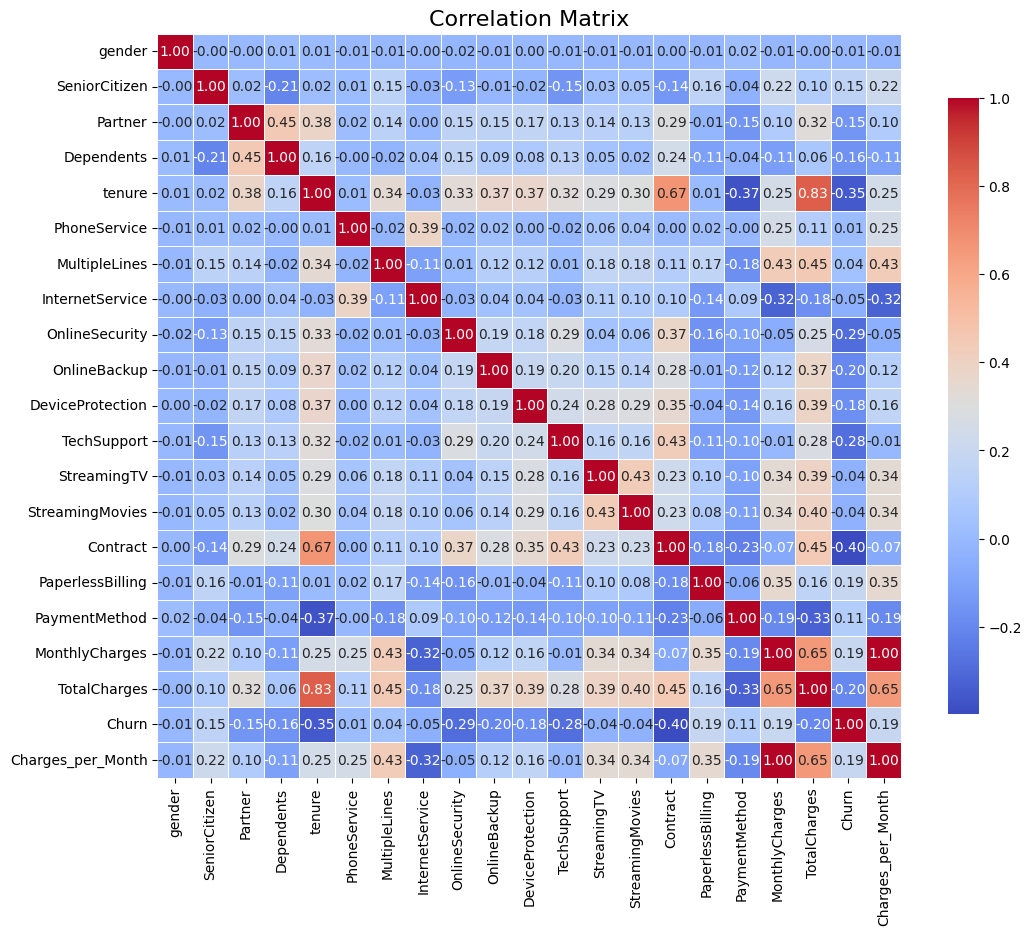

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, 
            annot=True,        # Display the correlation coefficients on the heatmap
            cmap='coolwarm',   # Color map for the heatmap
            fmt=".2f",        # Format for the annotation
            square=True,      # Make the cells square-shaped
            linewidths=0.5,   # Width of the lines that will divide each cell
            cbar_kws={"shrink": .8})  # Shrink color bar

plt.title('Correlation Matrix', fontsize=16)

plt.show()


The heatmap shows correlations between features. High correlations (close to 1 or -1) indicate that features are strongly related. Features like tenure, MonthlyCharges, and TotalCharges exhibit a strong correlation with churn, suggesting their importance in modeling.


### Feature Selection Using VIF


In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure there are no missing values and that all features are numeric
# Select only numerical columns for VIF calculation
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Check for missing values in the numerical columns
missing_numerical = df[numerical_cols].isnull().sum()
print("Missing values in numerical columns:\n", missing_numerical[missing_numerical > 0])

# If there are missing values, fill them with the median (you can choose another strategy as needed)
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Calculate VIF for the numerical features
vif_data = pd.DataFrame()
vif_data['Feature'] = numerical_cols
vif_data['VIF'] = [variance_inflation_factor(df[numerical_cols].values, i) for i in range(len(numerical_cols))]

# Display VIF data
print(vif_data.sort_values(by='VIF', ascending=False))


Missing values in numerical columns:
 Charges_per_Month    11
dtype: int64
              Feature         VIF
17     MonthlyCharges  104.705232
20  Charges_per_Month  102.991920
18       TotalCharges   10.662430
5        PhoneService    9.430947
4              tenure    7.510532
14           Contract    4.165894
7     InternetService    4.108751
16      PaymentMethod    3.478377
13    StreamingMovies    3.145338
12        StreamingTV    3.143036
2             Partner    2.775165
15   PaperlessBilling    2.657959
10   DeviceProtection    2.591065
6       MultipleLines    2.457724
11        TechSupport    2.428958
9        OnlineBackup    2.411492
8      OnlineSecurity    2.277249
3          Dependents    1.974262
0              gender    1.948118
19              Churn    1.801780
1       SeniorCitizen    1.348345


1. Check for Missing Values: The code checks for missing values in the numerical columns. If there are any, it fills them with the median value to ensure that VIF calculations do not fail.

2. Select Only Numeric Columns: We only calculate VIF for numerical columns since VIF is relevant for assessing multicollinearity among continuous variables.

3. Calculate VIF: The calculation is done using the updated DataFrame without missing values, ensuring the calculation proceeds without errors.



### Creating Interaction Features (Advanced)

In [11]:
# Create interaction features
df['Tenure_Charges'] = df['tenure'] * df['Charges_per_Month']
df['SeniorCitizen_MonthlyCharges'] = df['SeniorCitizen'] * df['MonthlyCharges']

# Display new interaction features
print(df[['Tenure_Charges', 'SeniorCitizen_MonthlyCharges']].head())


   Tenure_Charges  SeniorCitizen_MonthlyCharges
0        1.479139                          -0.0
1       -0.020273                          -0.0
2        0.439414                          -0.0
3       -0.407089                          -0.0
4       -0.451753                           0.0


Interaction features, such as Tenure_Charges, represent the multiplicative effect of tenure and monthly charges, potentially providing more nuanced insights into customer behavior. The SeniorCitizen_MonthlyCharges feature could indicate how senior citizens are affected by their monthly charges

### Binning Numerical Features (Advanced)

In [12]:
# Binning tenure into categories
df['Tenure_Category'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-1 Year', '1-2 Years', '2-3 Years', '3-4 Years', '4-5 Years', '5+ Years'])

# Display the binned feature
print(df[['tenure', 'Tenure_Category']].head())


     tenure Tenure_Category
0 -1.277445             NaN
1  0.066327        0-1 Year
2 -1.236724             NaN
3  0.514251        0-1 Year
4 -1.236724             NaN


Binning numerical features like tenure helps in creating categorical features that can improve model performance by capturing non-linear relationships. This approach may provide additional insights into customer churn based on tenure categories.


### Save Processed Dataset

In [13]:
# Save the processed dataset
df.to_csv('telco_customer_churn_processed.csv', index=False)


The cleaned and feature-engineered dataset is saved for subsequent model training, ensuring all preprocessing steps are retained for easy access.
